In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
# from tensorflow_datasets.image import dsprites

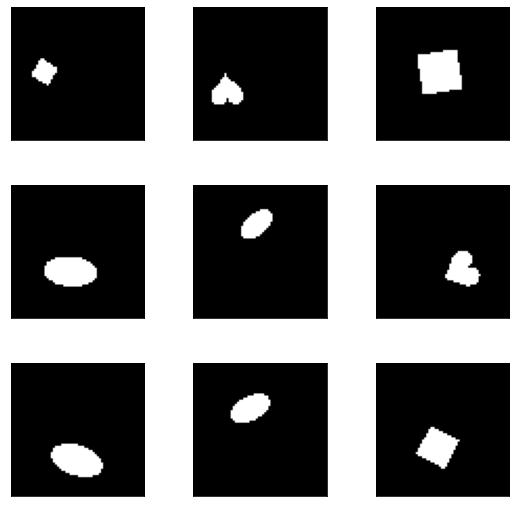

In [2]:
ds, ds_info = tfds.load('Dsprites', split='train', with_info=True)
fig = tfds.show_examples(ds, ds_info)

In [3]:
print(ds)

<PrefetchDataset shapes: {image: (64, 64, 1), label_orientation: (), label_scale: (), label_shape: (), label_x_position: (), label_y_position: (), value_orientation: (), value_scale: (), value_shape: (), value_x_position: (), value_y_position: ()}, types: {image: tf.uint8, label_orientation: tf.int64, label_scale: tf.int64, label_shape: tf.int64, label_x_position: tf.int64, label_y_position: tf.int64, value_orientation: tf.float32, value_scale: tf.float32, value_shape: tf.float32, value_x_position: tf.float32, value_y_position: tf.float32}>


In [4]:
batch_size = 128
dataset = ds.shuffle(buffer_size=1024).batch(batch_size)

In [5]:
import numpy as np

for elem in dataset:
    np_image = elem['image'].numpy()
    print(np.max(np_image))
    break

1


In [6]:
print(dataset.element_spec)

{'image': TensorSpec(shape=(None, 64, 64, 1), dtype=tf.uint8, name=None), 'label_orientation': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_scale': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_shape': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_x_position': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_y_position': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'value_orientation': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_scale': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_shape': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_x_position': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_y_position': TensorSpec(shape=(None,), dtype=tf.float32, name=None)}


In [7]:
enum_data = enumerate(dataset)
for step, elem in enum_data:
    train_image_batch = elem["image"]
    print(train_image_batch.shape)

    if step > 2:
        break

(128, 64, 64, 1)
(128, 64, 64, 1)
(128, 64, 64, 1)
(128, 64, 64, 1)


In [8]:
x = (1, 3, 5)
if isinstance(x, tuple):
    x = x[0]
print(x)

1


label_shape
[1 2 1 0 0 1 0 2 0 1 2 1 0 2 0 0 0 1 0 2 2 0 1 2 2 0 2 0 2 1 2 1 0 2 1 0 2
 0 0 2 0 1 0 0 1 1 0 0 1 2 2 0 0 0 1 0 2 2 0 2 0 2 1 2 1 2 2 2 1 0 2 2 0 1
 0 2 1 2 0 0 2 0 1 2 2 2 2 2 2 0 2 0 0 1 2 1 0 1 0 1 0 1 0 2 0 0 2 1 1 0 2
 0 0 0 1 0 2 0 1 2 0 0 0 2 2 2 2 2]
2
2


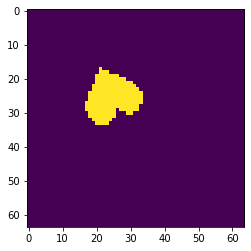

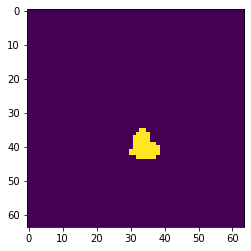

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = [
    'label_orientation',
    'label_scale',
    'label_shape',
    'label_x_position',
    'label_y_position'
]

batches = 1

# choose a generative factor
i = np.random.randint(5)
label = labels[i]
print(label)

enum_data = enumerate(dataset)
for step, batch in enum_data:
    # iterate over (batches) batch
    if step >= batches:
        break
    value_batch = batch[label].numpy()
    image_batch = batch['image'].numpy()
    print(value_batch)

    j=80
    _value_batch = np.delete(value_batch, j)
    index = np.where(_value_batch==value_batch[j])[0][0]
    if index>=j:
        index+=1
    print(value_batch[j])
    print(value_batch[index])

    plt.imshow(image_batch[j])
    plt.show()
    plt.imshow(image_batch[index])
    plt.show()